# **Data Preprocessing for Diabetes Dataset**

In this notebook, we will apply preprocessing steps to the diabetes dataset. The dataset contains various health indicators and a target variable indicating the diabetes status. We will perform the following preprocessing steps:

- 1
- 2
- 3

This preprocessing will prepare the data for further analysis and modeling.

In [19]:
# imports
import os
import sys

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # KBinsDiscretizer

sys.path.append(os.path.abspath("../scripts"))

## **Diabetes Dataset Description**
This dataset contains 22 features, including 17 categorical features such as 'HighBP', 'HighChol', and 'Smoker', and 4 numerical features like 'BMI', 'Age', 'MentHlth', and 'PhysHlth', with a total of 253680 entries.

### Target Variable
- **Diabetes_012**
    - 0 = no diabetes
    - 1 = prediabetes
    - 2 = diabetes

### Features

- **HighBP** (High Blood Pressure)
    - 0 = no high BP
    - 1 = high BP

- **HighChol** (High Cholesterol)
    - 0 = no high cholesterol
    - 1 = high cholesterol

- **CholCheck** (Cholesterol Check)
    - 0 = no cholesterol check in 5 years
    - 1 = yes cholesterol check in 5 years

- **BMI** (Body Mass Index)
    - Body Mass Index

- **Smoker**
    - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
    - 0 = no
    - 1 = yes

- **Stroke**
    - (Ever told) you had a stroke.
    - 0 = no
    - 1 = yes

- **HeartDiseaseorAttack** (Coronary Heart Disease or Myocardial Infarction)
    - 0 = no
    - 1 = yes

- **PhysActivity** (Physical Activity)
    - Physical activity in past 30 days - not including job
    - 0 = no
    - 1 = yes

- **Fruits**
    - Consume fruit 1 or more times per day
    - 0 = no
    - 1 = yes

- **Veggies** (Vegetables)
    - Consume vegetables 1 or more times per day
    - 0 = no
    - 1 = yes

- **HvyAlcoholConsump** (Heavy Alcohol Consumption)
    - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
    - 0 = no
    - 1 = yes

- **AnyHealthcare** (Any Health Care Coverage)
    - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
    - 0 = no
    - 1 = yes

- **NoDocbcCost** (No Doctor Because of Cost)
    - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
    - 0 = no
    - 1 = yes

- **GenHlth** (General Health)
    - Would you say that in general your health is:
        - 1 = excellent
        - 2 = very good
        - 3 = good
        - 4 = fair
        - 5 = poor

- **MentHlth** (Mental Health)
    - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?
    - Scale: 1-30 days

- **PhysHlth** (Physical Health)
    - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
    - Scale: 1-30 days

- **DiffWalk** (Difficulty Walking)
    - Do you have serious difficulty walking or climbing stairs?
    - 0 = no
    - 1 = yes

- **Sex**
    - 0 = female
    - 1 = male

- **Age**
    - 13-level age category (_AGEG5YR see codebook)
        -  1 = 18-24
        -  2 = 25-29
        -  3 = 30-34
        -  4 = 35-39
        -  5 = 40-44
        -  6 = 45-49
        -  7 = 50-54
        -  8 = 55-59
        -  9 = 60-64
        - 10 = 65-69
        - 11 = 70-74
        - 12 = 75-79
        - 13 = 80 or older

- **Education**
    - Education level (EDUCA see codebook)
        - 1 = Never attended school or only kindergarten
        - 2 = Grades 1 through 8 (Elementary)
        - 3 = Grades 9 through 11 (Some high school)
        - 4 = Grade 12 or GED (High school graduate)
        - 5 = College 1 year to 3 years (Some college or technical school)
        - 6 = College 4 years or more (College graduate)

- **Income**
    - Income scale (INCOME2 see codebook)
        - 1 = less than $10,000
        - 2 = less than $15,000
        - 3 = less than $20,000
        - 4 = less than $25,000
        - 5 = less than $35,000
        - 6 = less than $50,000
        - 7 = less than $75,000
        - 8 = $75,000 or more


In [20]:
# Read data
df = pd.read_csv("../data/raw/diabetes_012_health_indicators_BRFSS2015.csv")
# Convert all values in the dataframe to int
df = df.astype(int)

# Drop rows where the target variable is 1 (prediabetes), rename column and set values to 0, 1
# df = df[df['Diabetes_012'] != 1]
# df = df.rename(columns={'Diabetes_012': 'Diabetes'})
# df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x == 2 else 0)
# df.head()

# Merge the classes diabetes and prediabetes for the target variable
df["Diabetes"] = df["Diabetes_012"].apply(lambda x: 1 if x == 2 else x)
df = df.drop(columns=["Diabetes_012"])
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0


In [21]:
df.shape

(253680, 22)

In [22]:
# Lists for different types of features
binary_features = [
    "HighBP",
    "HighChol",
    "CholCheck",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "AnyHealthcare",
    "NoDocbcCost",
    "DiffWalk",
    "Sex",
]  # no further preprocessing required
ordinal_features = [
    "GenHlth",
    "Age",
    "Education",
    "Income",
]  # no further preprocessing required
numerical_features = [
    "MentHlth",
    "PhysHlth",
]  # will be normalized
binned_features = ["BMI"]  # will be binned to 0-3


# Split the data into training and testing sets using stratified split
# X = df.drop("Diabetes", axis=1)
# y = df["Diabetes"]
# strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

X_train = df.drop("Diabetes", axis=1)
y_train = df["Diabetes"]

# Create bins for the BMI
bin_edges = [0, 18.5, 25, 30, df["BMI"].max() + 1]
num_bins = len(bin_edges) - 1
labels = list(range(num_bins))
# X["BMI"] = pd.cut(
#     X["BMI"], bins=bin_edges, labels=labels, include_lowest=True, right=False
# )

X_train["BMI"] = pd.cut(X_train["BMI"], bins=bin_edges, labels=labels, include_lowest=True, right=False)

# for train_index, test_index in strat_split.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# spliting data into training, validation and test splits [80%, 10%, 10%]
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size = 0.1,
    random_state = 42,
    stratify = y_train
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = (1/9),
    random_state = 42,
    stratify = y_train
)

# Define the preprocessing pipeline
# binned_pipeline = Pipeline(steps=[
#     ('binner', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans'))
# ]) # => this is now done with custom logic above

numerical_pipeline = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("binned", "passthrough", binned_features),
        ("binary", "passthrough", binary_features),
        ("ordinal", "passthrough", ordinal_features),
    ],
)

# Apply the preprocessing pipeline to the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)

column_names = numerical_features + binned_features + binary_features + ordinal_features

# Convert preprocessed training and testing sets back into DataFrames with correct column names
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=column_names, index=X_train.index)
X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=column_names, index=X_val.index)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=column_names, index=X_test.index)

# Convert only binary features to int
binary_columns = binary_features + binned_features + ordinal_features

X_train_preprocessed_df[binary_columns] = X_train_preprocessed_df[binary_columns].astype(int)
X_val_preprocessed_df[binary_columns] = X_val_preprocessed_df[binary_columns].astype(int)
X_test_preprocessed_df[binary_columns] = X_test_preprocessed_df[binary_columns].astype(int)

# Display the shapes of the preprocessed datasets
print(f"X_train_preprocessed_df shape: {X_train_preprocessed_df.shape}")
print(f"X_val_preprocessed_df shape: {X_val_preprocessed_df.shape}")
print(f"X_test_preprocessed_df shape: {X_test_preprocessed_df.shape}")

X_train_preprocessed_df shape: (202944, 21)
X_val_preprocessed_df shape: (25368, 21)
X_test_preprocessed_df shape: (25368, 21)


In [23]:
X_train_preprocessed_df.head().T

,168534,198738,67524,228186,71776
MentHlth,-0.429655,-0.429655,3.624038,-0.429655,-0.429655
PhysHlth,-0.485387,-0.255673,2.386045,-0.485387,-0.140815
BMI,2.000000,3.000000,2.000000,2.000000,1.000000
HighBP,0.000000,0.000000,0.000000,0.000000,1.000000
HighChol,1.000000,0.000000,0.000000,0.000000,1.000000
CholCheck,1.000000,1.000000,1.000000,1.000000,1.000000
Smoker,0.000000,1.000000,0.000000,1.000000,1.000000
Stroke,0.000000,0.000000,0.000000,0.000000,0.000000
HeartDiseaseorAttack,0.000000,0.000000,0.000000,0.000000,0.000000
PhysActivity,0.000000,1.000000,1.000000,0.000000,1.000000


In [24]:
X_train_preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 168534 to 137382
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MentHlth              202944 non-null  float64
 1   PhysHlth              202944 non-null  float64
 2   BMI                   202944 non-null  int32  
 3   HighBP                202944 non-null  int32  
 4   HighChol              202944 non-null  int32  
 5   CholCheck             202944 non-null  int32  
 6   Smoker                202944 non-null  int32  
 7   Stroke                202944 non-null  int32  
 8   HeartDiseaseorAttack  202944 non-null  int32  
 9   PhysActivity          202944 non-null  int32  
 10  Fruits                202944 non-null  int32  
 11  Veggies               202944 non-null  int32  
 12  HvyAlcoholConsump     202944 non-null  int32  
 13  AnyHealthcare         202944 non-null  int32  
 14  NoDocbcCost           202944 non-null  int32  
 15  

In [25]:
# TODO
# PCA
# validate split

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
x_train_pca = pca.fit(X_train_preprocessed_df)

# Retrieve the eigenvectors (components)
eigenvectors = pca.components_

# Retrieve the eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

print(eigenvalues)

[9.6329138  4.79953392 1.55711327 0.83931621 0.68757647 0.62971418
 0.46076477 0.28284016 0.23474723 0.2274693  0.21007222 0.1660614
 0.15589257 0.12603519 0.09178525 0.07384346 0.07285873 0.05125919
 0.04113887 0.0353142  0.0333576 ]


Printing and Plotting the variance ratio of each principle components

In [27]:
num_comp = 1
for ratio in x_train_pca.explained_variance_ratio_:
    comp = "Component No. "
    text = comp + str(num_comp) + ":"
    
    print("Ratio of", text, ratio)
    num_comp += 1

Ratio of Component No. 1: 0.4719793632551156
Ratio of Component No. 2: 0.23516051460704013
Ratio of Component No. 3: 0.07629314935852656
Ratio of Component No. 4: 0.04112358327217577
Ratio of Component No. 5: 0.03368886217567674
Ratio of Component No. 6: 0.030853810429535104
Ratio of Component No. 7: 0.022575875600351132
Ratio of Component No. 8: 0.013858186803617684
Ratio of Component No. 9: 0.011501799919556592
Ratio of Component No. 10: 0.011145206777444837
Ratio of Component No. 11: 0.010292810283656983
Ratio of Component No. 12: 0.008136432613466343
Ratio of Component No. 13: 0.007638195423823099
Ratio of Component No. 14: 0.006175287192998304
Ratio of Component No. 15: 0.004497159112995541
Ratio of Component No. 16: 0.0036180733975285265
Ratio of Component No. 17: 0.0035698252879560553
Ratio of Component No. 18: 0.002511522399495998
Ratio of Component No. 19: 0.002015662020132658
Ratio of Component No. 20: 0.0017302734769240444
Ratio of Component No. 21: 0.0016344065919825183


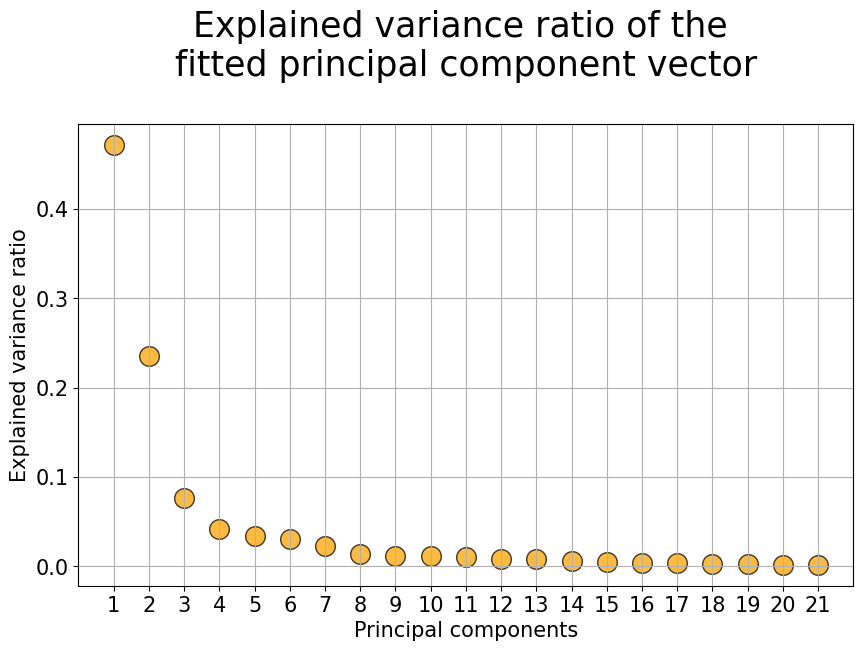

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(x_train_pca.explained_variance_ratio_))],
            y=x_train_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(x_train_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot illustrates that the $1^{st}$ principle component explains about 47% of the total variance in the data and the $2^{nd}$ component explains further 24%. This means that only the first two components already explain about 71% of the total variance and the remaining 19 components only 29%.

In [29]:
x_train_transformed = pca.transform(X_train_preprocessed_df)

x_train_transformed_df = pd.DataFrame(data=x_train_transformed)
x_train_transformed_df.head().T

,0,1,2,3,4
0,-3.414699,-0.422887,2.892175,-2.272448,4.030104
1,1.515641,1.646821,-0.277200,1.035775,0.500490
2,0.067464,0.215195,2.980847,0.566848,-0.185557
3,-0.053425,-1.469915,3.014767,-1.557087,-0.471928
4,0.417058,-0.916627,-0.841666,-0.831479,-0.748603
5,0.121475,0.204357,0.568361,-0.588083,-1.008165
6,0.146815,-0.647852,-0.839067,0.540579,0.685236
7,0.280920,0.482097,-0.810978,0.792397,0.568462
8,-0.803530,-0.358771,-0.369234,-0.838690,-0.162725
9,1.091871,-0.753846,-0.472277,-0.388866,0.683983


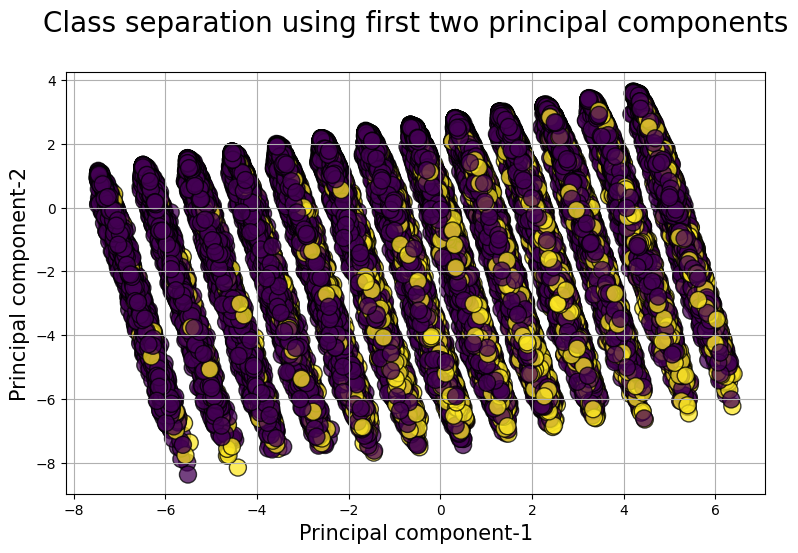

In [30]:
import numpy as np

# Get unique classes and map each class to a specific level for better visualization
unique_classes = np.unique(y_train)
class_levels = {cls: idx for idx, cls in enumerate(unique_classes)}

# Create new levels for each class for better separation in 1D plots
y_levels_pc1 = [class_levels[cls] for cls in y_train]  # Y-levels for PC1
x_levels_pc2 = [class_levels[cls] for cls in y_train]  # X-levels for PC2

plt.figure(figsize=(15,10))

# 2D scatter plot for the first two principal components
plt.subplot(2, 2, 1)
plt.scatter(x_train_transformed_df[0], x_train_transformed_df[1], c=y_train, edgecolors='k', alpha=0.75, s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n", fontsize=20)
plt.xlabel("Principal component-1", fontsize=15)
plt.ylabel("Principal component-2", fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
# Storing each dataset into .csv file
X_train_preprocessed_df.to_csv('../data/raw/dataset_train.csv')
X_val_preprocessed_df.to_csv('../data/raw/dataset_val.csv')
X_test_preprocessed_df.to_csv('../data/raw/dataset_test.csv')
x_train_transformed_df.to_csv('../data/raw/dataset_train_pca.csv')
